# Visualização dos resultados de treinamento

In [2]:
import matplotlib.pyplot as plt
import torch
from torchvision.models import resnet18, ResNet18_Weights
import dataset
from models import EncoderDecoder

checkpoint = torch.load('../data/checkpoints/M07/checkpoint.pt', map_location='cpu')
checkpoint.keys()

dict_keys(['params', 'model', 'optim', 'sched'])

In [3]:
ds_train, ds_valid, class_weights = dataset.get_dataset('../data/oxford_pets')
encoder = resnet18(weights=ResNet18_Weights.DEFAULT)
model = EncoderDecoder(encoder, decoder_channels=64, num_classes=2)
model.load_state_dict(checkpoint['model'])
model.eval();

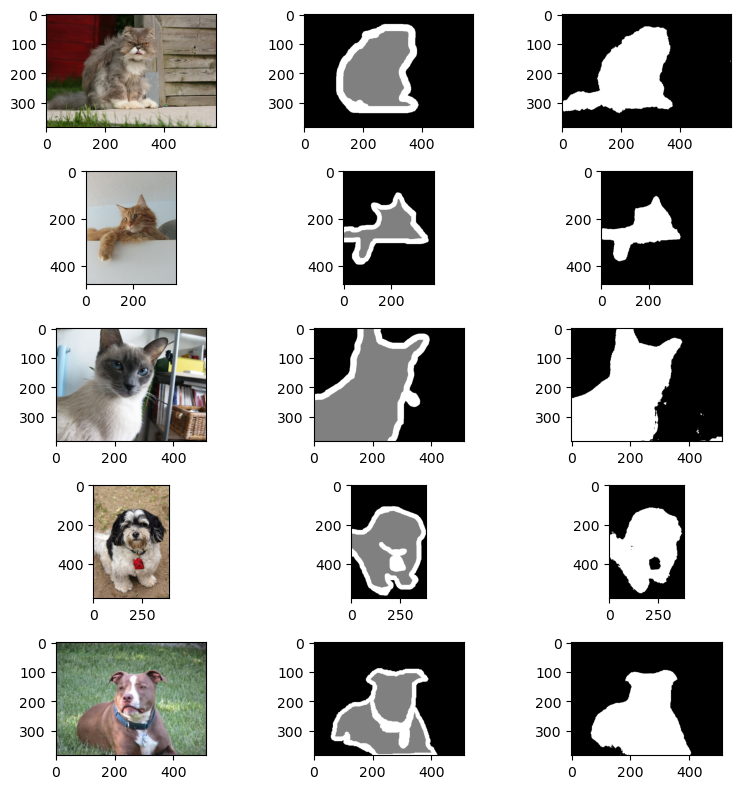

In [4]:
fig, axs = plt.subplots(5, 3, figsize=(8,8))
for idx in range(5):
    img, target = ds_valid[idx]
    with torch.no_grad():
        scores = model(img.unsqueeze(0))
    pred = torch.argmax(scores, dim=1)[0]
    axs[idx,0].imshow(dataset.unormalize(img))
    axs[idx,1].imshow(target, 'gray')
    axs[idx,2].imshow(pred, 'gray')
plt.tight_layout()